In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import mean_absolute_error,median_absolute_error,r2_score
from scipy.stats import kstest,shapiro,normaltest
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler,minmax_scale
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')

In [5]:
data = pd.read_csv('Health_insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<AxesSubplot:>

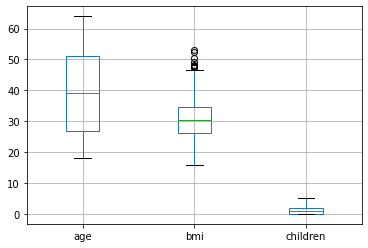

In [6]:
data.boxplot(column=['age','bmi','children'])

In [7]:
Q1 = data['bmi'].quantile(0.25)
Q2 = data['bmi'].quantile(0.50)
Q3 = data['bmi'].quantile(0.75)
IQR = Q3-Q1
LRANGE = Q1-1.5*IQR
URANGE = Q3+1.5*IQR
new = data.loc[data['bmi']>URANGE].index
data['bmi'].iloc[new] = data['bmi'].mean()

In [8]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.538195,1.094918,13270.422265
std,14.049960,5.899997,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.430000,2.000000,16639.912515
max,64.000000,46.750000,5.000000,63770.428010


<AxesSubplot:>

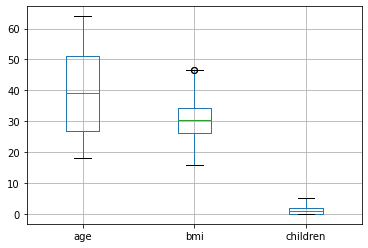

In [9]:
data.boxplot(column=['age','bmi','children'])

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [11]:
data.drop('region',axis=1,inplace=True)

In [12]:
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
charges     0
dtype: int64

In [13]:
data.sex.value_counts().to_dict()

{'male': 676, 'female': 662}

In [14]:
data.replace({'male': 0, 'female':1},inplace=True)

In [15]:
data.replace({'no': 0, 'yes':1},inplace=True)

In [16]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges'], dtype='object')

In [18]:
x = data.drop('charges',axis=1)
y = data.charges
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.80,random_state=10)

In [19]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [20]:
#model eval
y_pred = model.predict(x_train)
def model_eval(actual,pred):
    r2 = r2_score(actual,pred)
    print(f'training ac is = {r2}')
model_eval(y_train,y_pred)   

training ac is = 0.7620796053472506


In [21]:
#model eval
y_pred_test = model.predict(x_test)
def model_eval(actual,pred):
    r2 = r2_score(actual,pred)
    print(f'testing ac is = {r2}')
model_eval(y_test,y_pred_test)  

testing ac is = 0.6895021109147539


In [22]:
Lmodel = Lasso()
Lmodel.fit(x_train,y_train)

Lasso()

In [23]:
y_pred = Lmodel.predict(x_train)
def model_eval(actual,pred):
    r2 = r2_score(actual,pred)
    print(f'training ac is = {r2}')
model_eval(y_train,y_pred) 

training ac is = 0.7620795245502603


In [24]:
y_pred_test = Lmodel.predict(x_test)
def model_eval(actual,pred):
    r2 = r2_score(actual,pred)
    print(f'testing ac is = {r2}')
model_eval(y_test,y_pred_test) 

testing ac is = 0.6895329852895509


# KNN

In [25]:
scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.fit_transform(x_test)

In [26]:
knn_model = KNeighborsRegressor()
knn_model.fit(x_train,y_train)

KNeighborsRegressor()

In [27]:
knn_model = KNeighborsRegressor()
dic = {'n_neighbors':np.arange(10),'p':np.arange(10)}
grid = GridSearchCV(knn_model,dic)
grid.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'p': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])})

In [28]:
grid.best_estimator_

KNeighborsRegressor(n_neighbors=8, p=4)

In [29]:
hyp_knn_model = KNeighborsRegressor(n_neighbors=8, p=4)
hyp_knn_model.fit(x_train,y_train)
y_pred = hyp_knn_model.predict(x_train)
def model_eval(actual,pred):
    r2 = r2_score(actual,pred)
    print(f'training ac is = {r2}')
model_eval(y_train,y_pred) 

training ac is = 0.8674243338561752


In [30]:
y_pred_test = hyp_knn_model.predict(x_test)
def model_eval(actual,pred):
    r2 = r2_score(actual,pred)
    print(f'testing ac is = {r2}')
model_eval(y_test,y_pred_test) 

testing ac is = 0.7746634930393315


# DecisionTreeRegressor

In [53]:
dt_model = DecisionTreeRegressor(random_state=5)
dt_model.fit(x_train,y_train)
y_pred = dt_model.predict(x_train)
def model_eval(actual,pred):
    r2 = r2_score(actual,pred)
    print(f'training ac is = {r2}')
model_eval(y_train,y_pred) 

training ac is = 1.0


In [32]:
y_pred_test = dt_model.predict(x_test)
def model_eval(actual,pred):
    r2 = r2_score(actual,pred)
    print(f'testing ac is = {r2}')
model_eval(y_test,y_pred_test) 

testing ac is = 0.6099285120166111


In [54]:
dt_model = DecisionTreeRegressor()
dic = {'criterion':["squared_error", "absolute_error"],
        'max_depth':np.arange(10),
    'min_samples_split':np.arange(10),
    'min_samples_leaf':np.arange(10),}
grid = RandomizedSearchCV(dt_model,dic,cv=5)
grid.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(),
                   param_distributions={'criterion': ['squared_error',
                                                      'absolute_error'],
                                        'max_depth': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_leaf': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])})

In [55]:
grid.best_estimator_

DecisionTreeRegressor(criterion='absolute_error', max_depth=6,
                      min_samples_leaf=8, min_samples_split=9)

In [56]:
dt_model = DecisionTreeRegressor(criterion='absolute_error', max_depth=6,
                      min_samples_leaf=8, min_samples_split=9,random_state=5)
dt_model.fit(x_train,y_train)
y_pred = dt_model.predict(x_train)
def model_eval(actual,pred):
    r2 = r2_score(actual,pred)
    print(f'training ac is = {r2}')
model_eval(y_train,y_pred) 

training ac is = 0.8694725707847871


In [57]:
y_pred_test = dt_model.predict(x_test)
def model_eval(actual,pred):
    r2 = r2_score(actual,pred)
    print(f'testing ac is = {r2}')
model_eval(y_test,y_pred_test) 

testing ac is = 0.8104546884526288


# RandomForestRegressor

In [58]:
rm_model = RandomForestRegressor(random_state=5)
rm_model.fit(x_train,y_train)
y_pred = rm_model.predict(x_train)
def model_eval(actual,pred):
    r2 = r2_score(actual,pred)
    print(f'training ac is = {r2}')
model_eval(y_train,y_pred) 

training ac is = 0.976963471663301


In [59]:
y_pred_test = rm_model.predict(x_test)
def model_eval(actual,pred):
    r2 = r2_score(actual,pred)
    print(f'testing ac is = {r2}')
model_eval(y_test,y_pred_test) 

testing ac is = 0.8014374369022507


# hyper parameter

In [60]:
rm_model = RandomForestRegressor()
dic = {'n_estimators':np.arange(10,200,10),
       'criterion':["squared_error", "absolute_error"],
        'max_depth':np.arange(10),
    'min_samples_split':np.arange(10),
    'min_samples_leaf':np.arange(10),}
grid = RandomizedSearchCV(rm_model,dic,cv=5)
grid.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'criterion': ['squared_error',
                                                      'absolute_error'],
                                        'max_depth': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_leaf': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190])})

In [61]:
grid.best_estimator_

RandomForestRegressor(criterion='absolute_error', max_depth=5,
                      min_samples_leaf=2, min_samples_split=6,
                      n_estimators=150)

In [63]:
y_pred_test = rm_model.predict(x_test)
def model_eval(actual,pred):
    r2 = r2_score(actual,pred)
    print(f'testing ac is = {r2}')
model_eval(y_test,y_pred_test)

testing ac is = 0.8155256048325037


In [62]:
rm_model = RandomForestRegressor(criterion='absolute_error', max_depth=5,
                      min_samples_leaf=2, min_samples_split=6,
                      n_estimators=150,random_state=5)
rm_model.fit(x_train,y_train)
y_pred = rm_model.predict(x_train)
def model_eval(actual,pred):
    r2 = r2_score(actual,pred)
    print(f'training ac is = {r2}')
model_eval(y_train,y_pred)

training ac is = 0.870811638455721


In [64]:
import pickle
with open('model.pkl','wb') as file:
    pickle.dump(rm_model,file)